In [248]:
import cv2 as cv 
import numpy as np 
from matplotlib import pyplot as plt  


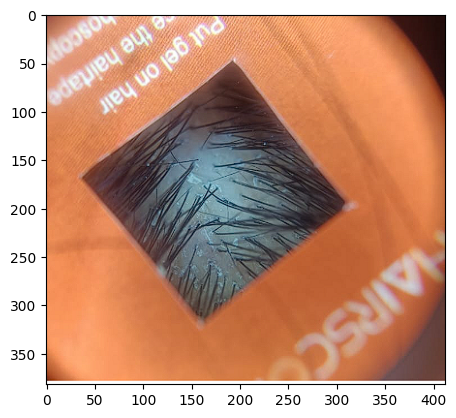

In [249]:
main_img=cv.imread(r'C:\Users\K NONIESH REDDY\OneDrive\Desktop\internship\segement\main.png')
main_clr=cv.cvtColor(main_img,cv.COLOR_BGR2RGB)
plt.imshow(main_clr)

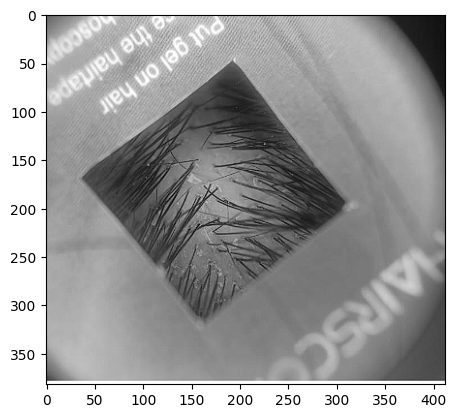

In [250]:
#converting to gray scale
main_gray=cv.cvtColor(main_clr,cv.COLOR_RGB2GRAY)
plt.imshow(main_gray,cmap='gray')

Thresholding

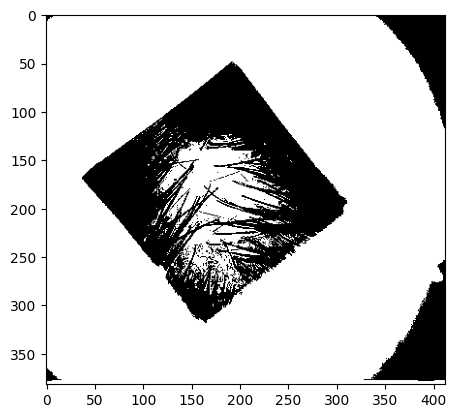

In [251]:
_, binary_image = cv.threshold(main_gray, 110, 255, cv.THRESH_BINARY)
plt.imshow(binary_image,cmap='gray')

Finding Contours

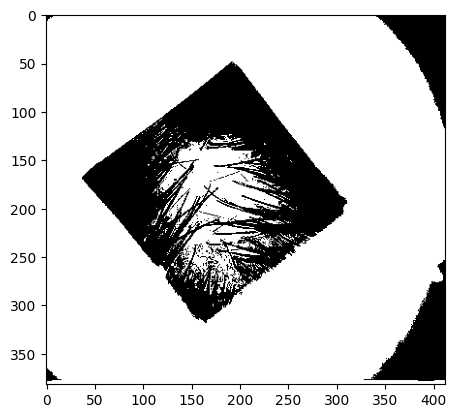

In [252]:
contours, _ = cv.findContours(binary_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

mask = np.zeros_like(binary_image)
cv.drawContours(mask,contours, -1, (255), thickness=cv.FILLED)
plt.imshow(mask, cmap='gray')
plt.show()

Finding Squares

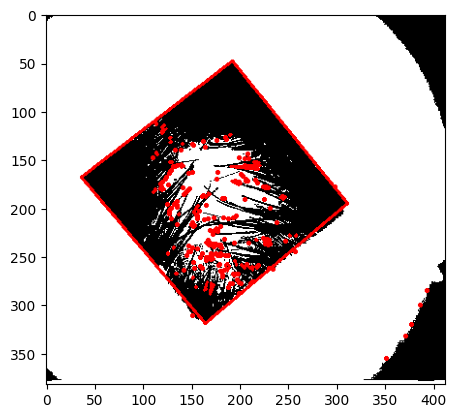

In [253]:
squares = []
square_areas = []
for contour in contours:
    perimeter = cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, 0.04 * perimeter, True)
    if len(approx) == 4:  # Check if the contour has 4 corners (is a square or rectangle)
        squares.append(approx)
        area = cv.contourArea(contour)
        square_areas.append(area)

# Draw squares on the original image

image_with_squares = cv.cvtColor(binary_image, cv.COLOR_GRAY2BGR)
cv.drawContours(image_with_squares, squares, -1, (255, 0, 0), 2)
plt.imshow(image_with_squares)

Finding Square with Maximum Area

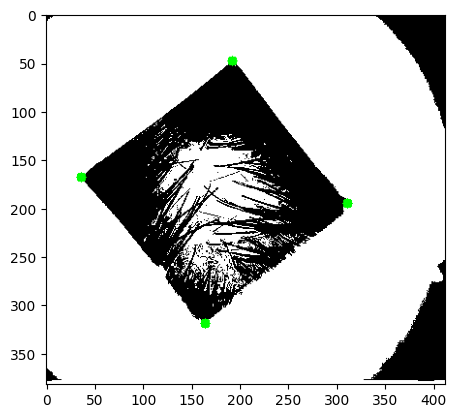

In [254]:
max_area_index = np.argmax(square_areas)
max_area_square = squares[max_area_index]
image_with_squares = cv.cvtColor(binary_image, cv.COLOR_GRAY2BGR)
for i in max_area_square:
    for point in i:
        cv.circle(image_with_squares,tuple(point),5,(0,255,0),-1)
plt.imshow(image_with_squares)

Creating Mask

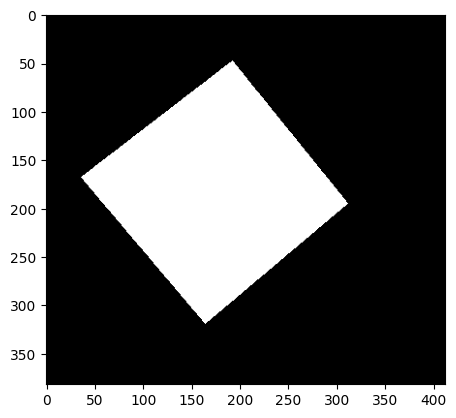

In [255]:

mask = np.zeros_like(binary_image)
max_area_square=np.array(max_area_square)

hull = cv.convexHull(max_area_square)
fill_color = (255, 0, 0)
cv.fillConvexPoly(mask, hull, fill_color)
plt.imshow(mask,cmap='gray')

Masked Image

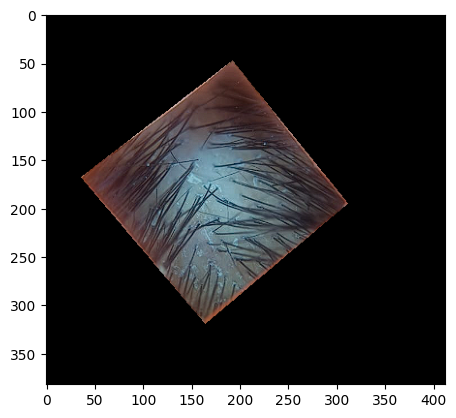

In [256]:
masked_image = cv.bitwise_and(main_clr, main_clr, mask=mask)
plt.imshow(masked_image)